In [1]:
#----------------MODEL NUMBER 2------------------------------------#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import pickle
plt.style.use('bmh')

#This is our base dataset for adoni market
market = pd.read_csv("adoni_market.xls")

In [2]:
kapas = market.loc[market['Variety'] == 'Kapas (Adoni)']

In [3]:
kapas = kapas[['Arrival_Date','Min Price','Max Price','Modal Price']]

#Dataset after 2500 rows is continuous i.e very less dates are missing
#DATA FROM YEAR 2011
kapas = kapas.loc[2500: , :]
kapas.reset_index(drop=True)
kapas.set_index('Arrival_Date')
# kapas['Arrival_Date'] = pd.to_datetime(kapas['Arrival_Date'])
kapas

,Arrival_Date,Min Price,Max Price,Modal Price
2516,01/01/2011,3611,4629,4400
2517,03/01/2011,3569,4596,4350
2518,04/01/2011,3569,4596,4350
2519,05/01/2011,3751,4729,4450
2520,07/01/2011,3800,4749,4450
...,...,...,...,...
4911,12/03/2018,3401,5179,4329
4912,13/03/2018,3367,5128,4329
4913,14/03/2018,3369,5162,4339
4914,15/03/2018,3369,5189,4335


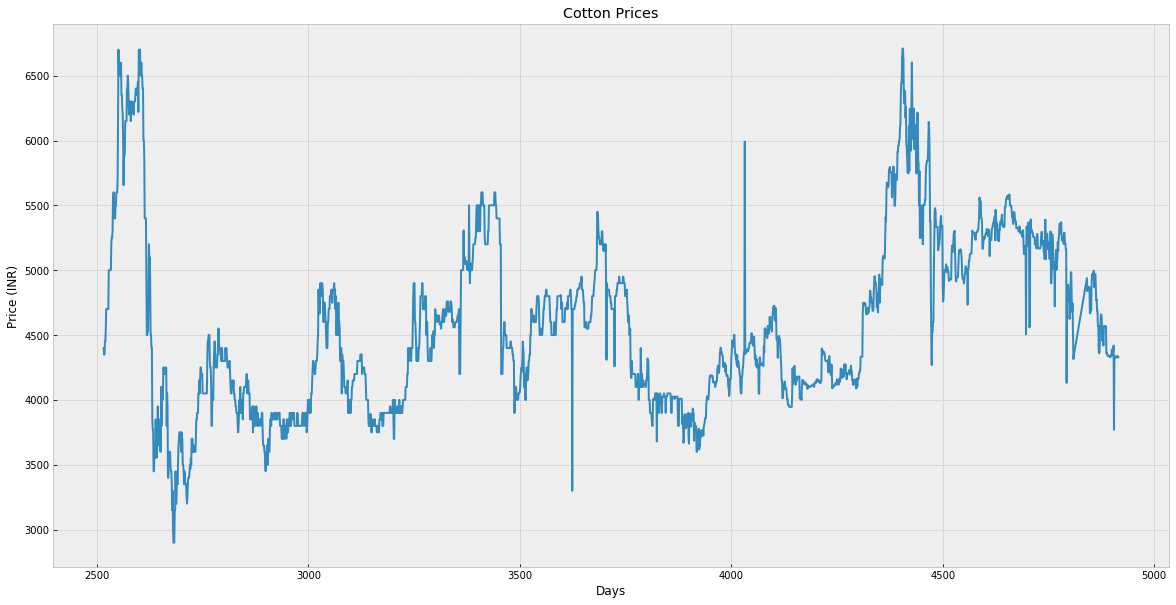

In [5]:
plt.figure(figsize=(20,10))
plt.plot(kapas["Modal Price"])
# plt.plot(kapas["Min Price"])
# plt.plot(kapas["Max Price"])
plt.title('Cotton Prices')
plt.ylabel('Price (INR)')
plt.xlabel('Days')
# plt.legend(['Modal Price', 'Min Price', 'Max Price'], loc='upper right')
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
kapas_modal = kapas.iloc[:, 3:].values
training_set, test_set = train_test_split(kapas_modal, train_size=0.8, test_size=0.2, shuffle=False)

In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
X_train = []
y_train = []
for i in range(60, 1892):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [11]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 25))
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1832/1832 [==============================] - 9s 5ms/step - loss: 0.0149
Epoch 2/100
1832/1832 [==============================] - 8s 4ms/step - loss: 0.0043
Epoch 3/100
1832/1832 [==============================] - 8s 4ms/step - loss: 0.0038
Epoch 4/100
1832/1832 [==============================] - 8s 5ms/step - loss: 0.0030
Epoch 5/100
1832/1832 [==============================] - 8s 5ms/step - loss: 0.0033
Epoch 6/100
1832/1832 [==============================] - 9s 5ms/step - loss: 0.0027
Epoch 7/100
1832/1832 [==============================] - 9s 5ms/step - loss: 0.0025
Epoch 8/100
1832/1832 [==============================] - 9s 5ms/step - loss: 0.0024
Epoch 9/100
1832/1832 [==============================] - 9s 5ms/step - loss: 0.0023
Epoch 10/100
1832/1832

1832/1832 [==============================] - 13s 7ms/step - loss: 0.0012
Epoch 59/100
1832/1832 [==============================] - 14s 8ms/step - loss: 0.0012
Epoch 60/100
1832/1832 [==============================] - 15s 8ms/step - loss: 0.0012
Epoch 61/100
1832/1832 [==============================] - 15s 8ms/step - loss: 0.0012
Epoch 62/100
1832/1832 [==============================] - 14s 8ms/step - loss: 0.0013
Epoch 63/100
1832/1832 [==============================] - 14s 8ms/step - loss: 0.0013
Epoch 64/100
1832/1832 [==============================] - 14s 8ms/step - loss: 0.0014
Epoch 65/100
1832/1832 [==============================] - 14s 8ms/step - loss: 0.0012
Epoch 66/100
1832/1832 [==============================] - 14s 8ms/step - loss: 0.0012
Epoch 67/100
1832/1832 [==============================] - 14s 8ms/step - loss: 0.0012
Epoch 68/100
1832/1832 [==============================] - 15s 8ms/step - loss: 0.0013
Epoch 69/100
1832/1832 [==============================] - 15s 8ms/s

In [24]:
#saving model to disk
pickle.dump(regressor, open('model2.pkl', 'wb'))

In [48]:
#------CODE FOR CHECKING IF MODEL IS UNDERFITTED OR OVERFITTED---------

#history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = 0.33)

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model train vs validation loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper right')
# plt.show()

In [27]:
model = pickle.load(open('model2.pkl', 'rb'))

In [28]:
inputs = kapas_modal[len(kapas_modal) - len(test_set) - 60 : ]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 534):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_cotton_price = model.predict(X_test)
predicted_cotton_price = sc.inverse_transform(predicted_cotton_price)

In [29]:
rmse = sqrt(mean_squared_error(test_set, predicted_cotton_price))
rmse

150.86943468009673

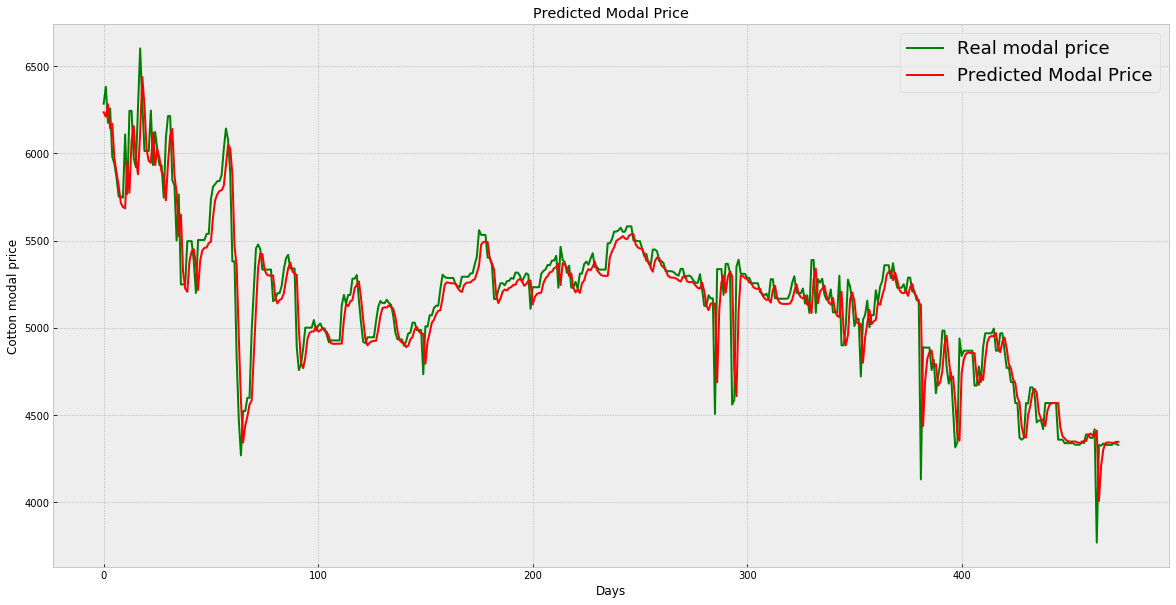

In [19]:
#Plotting the data
plt.figure(figsize=(20,10))
plt.plot(test_set, color= 'green', label = 'Real modal price')
plt.plot(predicted_cotton_price, color = 'red', label = 'Predicted Modal Price')
plt.title('Predicted Modal Price')
plt.xlabel('Days')
plt.ylabel('Cotton modal price')
plt.legend(fontsize=18)
plt.show()

In [32]:
kapas_modal_future = kapas_modal.copy()
last_60_days = kapas_modal_future[-60:]
last_60_days_scaled = sc.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = sc.inverse_transform(pred_price)
print(pred_price)

[[4342.369]]


In [33]:
def future_prediction(days):
    kapas_modal_future = kapas_modal.copy()
    for i in range(days):
        last_60_days = kapas_modal_future[-60:]
        last_60_days_scaled = sc.transform(last_60_days)
        X_test = []
        X_test.append(last_60_days_scaled)
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        pred_price = regressor.predict(X_test)
        pred_price = sc.inverse_transform(pred_price)
        kapas_modal_future = np.append(kapas_modal_future, pred_price, axis=0)
        future_prices = kapas_modal_future[-days:]
#         print('prediction for day ', i , ": ", pred_price)
    return pred_price

future_prediction(2)

array([[4349.4805]], dtype=float32)

In [33]:
future_prices

NameError: name 'future_prices' is not defined